In [1]:
pip install easygui

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tkinter as tk  # graphical user interface toolkit
from tkinter import *
import easygui  # to open the filebox
import cv2  # for image processing
import matplotlib.pyplot as plt
import os  # to read and save path
import sys

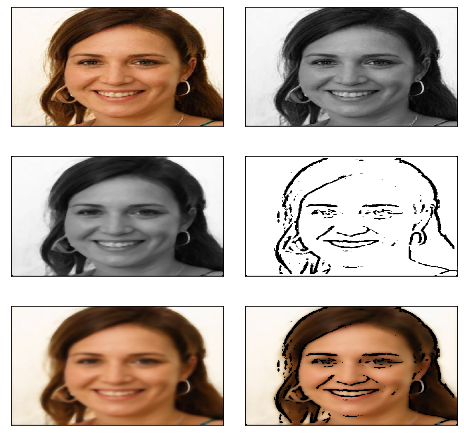

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Arzoo\Anaconda3a\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-2-96268fd16b9d>", line 63, in <lambda>
    savel = Button(top, text="Save cartoon image", command=lambda: save(resize_image6, path_of_image), padx=30, pady=5)
  File "<ipython-input-2-96268fd16b9d>", line 79, in save
    tk.messagebox.showinfo(title=None, message=I)
AttributeError: module 'tkinter' has no attribute 'messagebox'


In [2]:
#Making the GUI main window
top = tk.Tk()    #Tk() fn is called and assigned to the variable named top.
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='yellow')
label = Label(top, background='#CDCDCD', font=('calibri', 20, 'bold'))

#Creating filebox
def paste():                                  #fileopenbox opens box through which we choose image from our device
    path_of_image = easygui.fileopenbox()         #and also help us store path of file as string
    cartoon_img(path_of_image)                  #It will open the pop box to choose the file.


#Storing an image:
def cartoon_img(path_of_image):
    # reading an image
    orig_img = cv2.imread(path_of_image)    #imread is a method in cv2 which is used to store images in the form of numbers.  
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    

    #to confirm that the chosen file is an image or not
    if orig_img is None:
        print("Not an image!Choose another file.")
        sys.exit()
    resize_image1 = cv2.resize(orig_img, (960, 540)) #resizing original image
    # plt.imshow(resize_image1, cmap='gray')

    # conversion of image to grayscale:
    gray_scale_image = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY) #cvtColor is a method in cv2 which is used to tranform an 
    resize_image2 = cv2.resize(gray_scale_image, (960, 540))      #image into colour space using BGR2GRAY flag.
    # plt.imshow(resize_image2, cmap="gray")

    #Smoothing an image using median blur
    smooth_gray_scale_image = cv2.medianBlur(gray_scale_image, 5) #medianBlur fn in cv2 is smoothing.
    resize_image3 = cv2.resize(smooth_gray_scale_image, (960, 540))
    #  plt.imshow(resize_image3, cmap='gray')

    # For cartoon effect, retrieving the edges
    # Use of threshold technique
    get_edge = cv2.adaptiveThreshold(smooth_gray_scale_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    resize_image4 = cv2.resize(get_edge, (960, 540))
    # plt.imshow(resize_image4, cmap='gray')

    # Removing noise using bilateral filter
    # Keeping the edges sharp
    color_image = cv2.bilateralFilter(orig_img, 9, 300, 300) #bilateralFilter from cv2 removes noise
    resize_image5 = cv2.resize(color_image, (960, 540))
    # plt.imshow(resize_image5, cmap="gray")

    # masking edged image with our "BEAUTIFY" image (giving cartoon effect)
    cartoon_image = cv2.bitwise_and(color_image, color_image, mask=get_edge) #We are combining 2 img(highlighted edge img and smooth color)
    resize_image6 = cv2.resize(cartoon_image, (960, 540))                     
    # plt.imshow(resize_image6, cmap='gray')

    # Plotting the entire transition
    images = [resize_image1, resize_image2, resize_image3, resize_image4, resize_image5, resize_image6]
    fig, axes = plt.subplots(3, 2, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    # Creating a Save button in the GUI main window
    savel = Button(top, text="Save cartoon image", command=lambda: save(resize_image6, path_of_image), padx=30, pady=5)
    savel.configure(background='#364156', foreground='white', font=('calibri', 10, 'bold'))
    savel.pack(side=TOP, pady=50)

    # save button code
    plt.show()

#We take the old path and just change the name of the old file
#to a new name and store the cartoonified image in the same folder.
def save(resize_image6, path_of_image):
    new_name = "cartoonified_Image"  # saving an image using imwrite function
    path1 = os.path.dirname(path_of_image) 
    extension = os.path.splitext(path_of_image)[1]
    path = os.path.join(path1, new_name + extension)
    cv2.imwrite(path, cv2.cvtColor(resize_image6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + new_name + " at " + path
    tk.messagebox.showinfo(title=None, message=I)


# Creating Cartoonify button in the GUI main window
paste = Button(top, text="Cartoonify an Image", command=paste, padx=10, pady=5)
paste.configure(background="#374256", foreground="wheat", font=('calibri', 10, 'bold'))
paste.pack(side=TOP, pady=50)

# Main function to create the GUI window
top.mainloop()